In [1]:
#@author: Venky Rao raove@us.ibm.com
#@last edited: 14 Oct 2017
#@source: materials, data and examples adapted from R in Action 2nd Edition by Dr. Robert Kabacoff

# Regression in R

In [2]:
#in many ways, regression analysis lives at the heart of statistics
#it is a broad term for a set of methodologies used to predict a response variable
#(also called a dependent, criterion or outcome variable) from one or more
#predictor variables (also called independent or explanatory variables)

## Ordinary Least Squares (OLS) regression

In [3]:
#in OLS regression, a quantitative dependent variable is predicted from a weighted sum of
#predictor variables, where the weights are parameters estimated from the data.
#OLS regression is the most common variety of statistical analysis today.
#the methods that fall under the rubric of OLS regression include simple linear regression,
#polynomial regression and multiple linear regression.

### Simple linear regression

In [1]:
#we use the dataset "women" in the base installation of R which provides the height
#and weight of 15 women of ages 30 to 39.  The following code calculates an equation
#for predicting weight from height.
#let's review the dataset first
women

height,weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [9]:
#fit a simple linear regression model
fit <- lm(weight ~ height, data = women)
#display results of the fitted model
summary(fit)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [11]:
#because a height of zero is impossible, you would not try to give a physical interpretation
#to the intercept

#from the Pr(>|t|) column, you see that the regression coefficient (3.45) is signiticantly
#different from zero (p < 0.001) and indicates that there is an expected increase of 3.45
#pounds of weight for every 1 inch increase in height.
#1.091e-14 = 1.091 * 10^-14 = 0.000000...
#let us understand this further:
##let us begin with a hypothesis: height and weight are independent
#the p-value is the probability of obtaining the sampled results, assuming independence of
     #the row and column variables in the population.
#because p-value < 0.001, you reject the hypothesis that height and weight are independent!

#the multiple R-squared (0.991) indicates that the model accounts for 99.1% of variance in heights
#the multiple R-squared is the squared correlation between the actual and predicted value

#the residual standard error (1.53 pounds) can be thought of as the average error in predicting
#weight from height using this model

#the F-statistic tests whether the predictor variables, take together, predict the response variable
#above chance levels.  because there is only one predictor variable in simple regression, in this
#example, the F-statistic is equivalent to the t-test for regression coefficient for height

In [3]:
#list all the weights of women
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [5]:
#list all the predicted values in a fitted model
round(fitted(fit))

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
113 116 119 123 126 130 133 137 140 144 147 151 154 157 161

In [7]:
#list the residual values in a fitted model
round(residuals(fit))

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
 2  1  1  0  0 -1 -1 -2 -1 -2 -1 -1  0  2  3

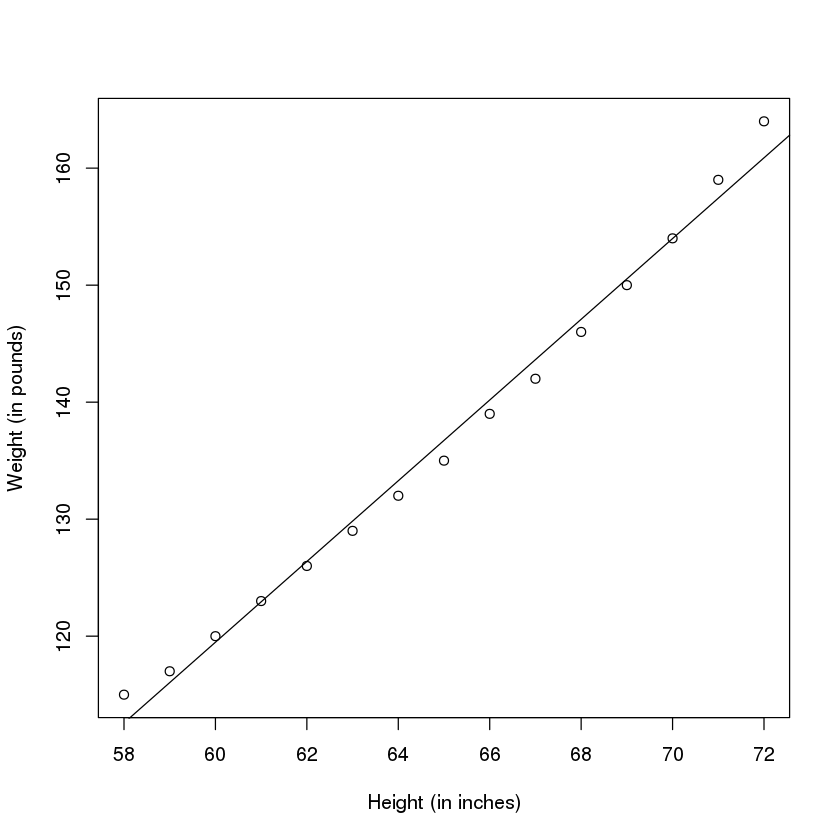

In [8]:
#plot height versus weight and add a line of fit
plot(women$height, women$weight,
    xlab = "Height (in inches)", # x-axis label
    ylab = "Weight (in pounds)") #y-axis label
abline(fit) #add the line of fit

In [9]:
#list the coefficients of the fitted model
coefficients(fit)

(Intercept)      height 
  -87.51667     3.45000

In [12]:
#from the above, we can see that the prediction equation is:
#predictedWeight = -87.52 + 3.45 * Height

### Polynomial regression

In [3]:
#the following code shows the results of fitting a quadratic equation
fit2 <- lm(weight ~ height + I(height ^ 2), data = women)
summary(fit2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


In [4]:
#the term "height ^ 2" adds a height-squared term to the prediction equation
#the "I" function treats the contents within the parenthesis as an R regular expression.

#from this analysis, the new prediction equation is:
# predictedWeight = 261.88 - 7.35 * Height + 0.083 * (Height ^ 2)
#both regression coefficients are significant at the p < 0.0001 level
#regression coefficient for height has Pr(>|t|) = 6.58e-07 = 6.58 * 10 ^ -7 = 0.000000658 
#regression coefficient for height ^ 2 has Pr(>|t|) = 9.32e-09 = 9.32 * 10 ^ -9 = 0.00000000932

#the p-value is the probability of obtaining the sampled results, assuming independence of
     #the row and column variables in the population.
#because p-value < 0.001, you reject the hypothesis that height and weight and height ^ 2 and weight are independent!

#the multiple R-squared has improved from 0.991 in the simple linear model to
#0.9995 in the quadratic model.  This shows that the amount of variance accounted for has increased (this is a good thing!)

#the significance of the squared term (t = 13.89, p < 0.01) suggests that the inclusion of the quadratic term improves model fit
#the plot below confirms this

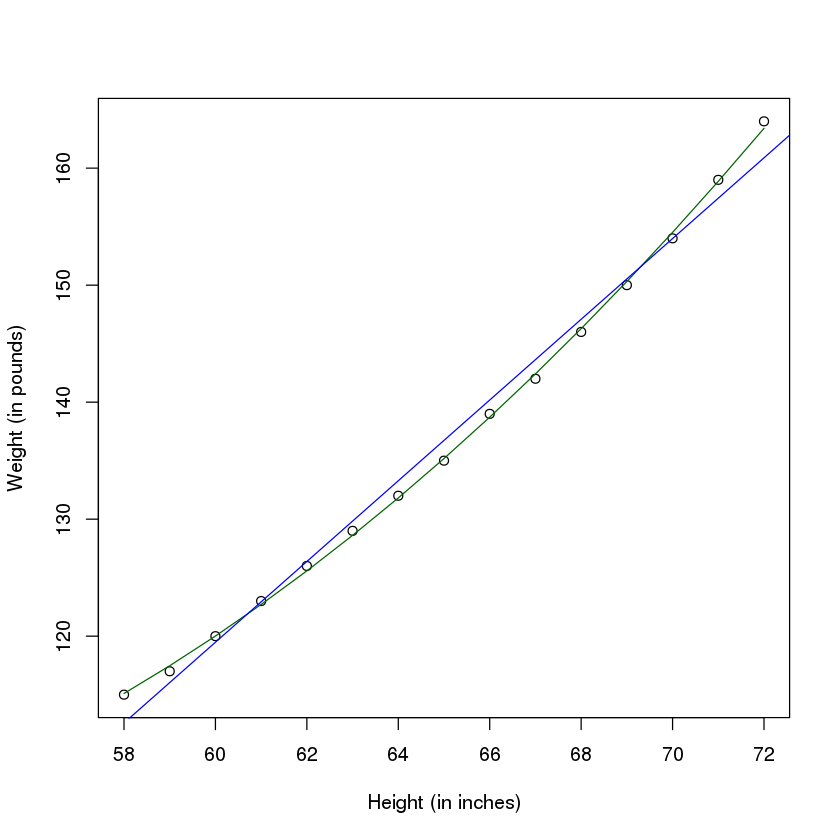

In [16]:
#plot height versus weight and add a line of fit
plot(women$height, women$weight,
    xlab = "Height (in inches)", # x-axis label
    ylab = "Weight (in pounds)") #y-axis label
lines(women$height, fitted(fit2), col = "dark green") #add the line of fit including the quadratic term
abline(fit, col = "blue") #adding the original line of fit

In [18]:
#to fit a cubic polynomial, use the following code:
fit3 <- lm(weight ~ height + I(height ^ 2) + I(height ^ 3), data = women)
summary(fit3)
#although higher polynomials are possible, terms higher than cubic are rarely necessary


Call:
lm(formula = weight ~ height + I(height^2) + I(height^3), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40677 -0.17391  0.03091  0.12051  0.42191 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -8.967e+02  2.946e+02  -3.044  0.01116 * 
height       4.641e+01  1.366e+01   3.399  0.00594 **
I(height^2) -7.462e-01  2.105e-01  -3.544  0.00460 **
I(height^3)  4.253e-03  1.079e-03   3.940  0.00231 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2583 on 11 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 1.679e+04 on 3 and 11 DF,  p-value: < 2.2e-16


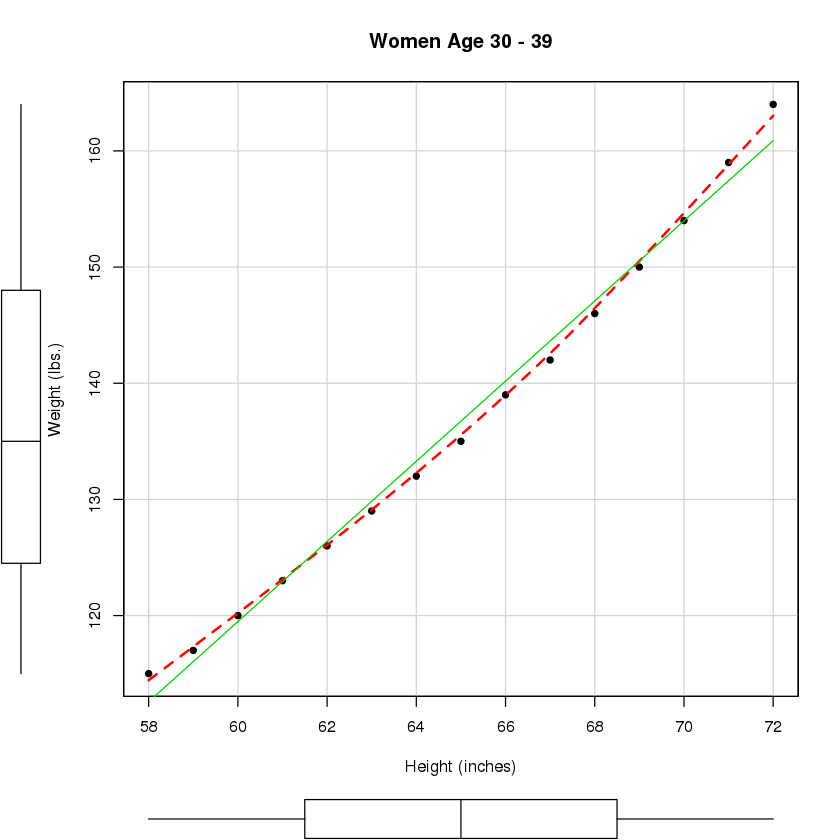

In [20]:
#the scatterplot() function in the "car" package provides a simple and convenient
#method of plotting a bivariate relationship.  here's an example:
#install.packages("car") in case you need to install the car package
library(car) #load the "car" package
scatterplot(weight ~ height, data = women, #data that you want to plot
           spread = FALSE, #this option suppresses spread and asymmetry information
            smoother.args = list(lty = 2), #specifies that the loess fit be rendered as a dashed line
           pch = 19, #displays points as filled circles
           main = "Women Age 30 - 39", #main title
           xlab = "Height (inches)", #x-axis label
           ylab = "Weight (lbs.)") #y-axis label

In [21]:
#you can tell from the chart above that the two variables are roughly
#asymmetrical and that a curved line will fit the data points better than a straight line

#loess stands for locally weighted scatterplot smoothing.  More information can be found here:
# https://en.wikipedia.org/wiki/Local_regression

### Multiple linear regression

In [2]:
#when there is more than one predictor variable, simple regression becomes
#multiple linear regression.  Technically, ploynomial regression is a special
#case of multiple regression

#to understand multiple linear regression, we will use the states.x77 dataset
#in the base R package and explore the relationship between a state's murder rate
#and other characteristics of the state including population, illiteracy rate,
#average income and frost levels (mean number of days below freezing)

In [56]:
#the states.x77 dataset is contained in a matrix.  Since the lm() function needs
#a data frame, we first create a data frame using the following code:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
states #print the data frame

,Murder,Population,Illiteracy,Income,Frost
Alabama,15.1,3615,2.1,3624,20
Alaska,11.3,365,1.5,6315,152
Arizona,7.8,2212,1.8,4530,15
Arkansas,10.1,2110,1.9,3378,65
California,10.3,21198,1.1,5114,20
Colorado,6.8,2541,0.7,4884,166
Connecticut,3.1,3100,1.1,5348,139
Delaware,6.2,579,0.9,4809,103
Florida,10.7,8277,1.3,4815,11
Georgia,13.9,4931,2.0,4091,60


In [4]:
#a good first step in multiple regression is to examine the relationships among
#the variables two at a time.  Let's do this below:
cor(states) #this function provides the bivariate correlations

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


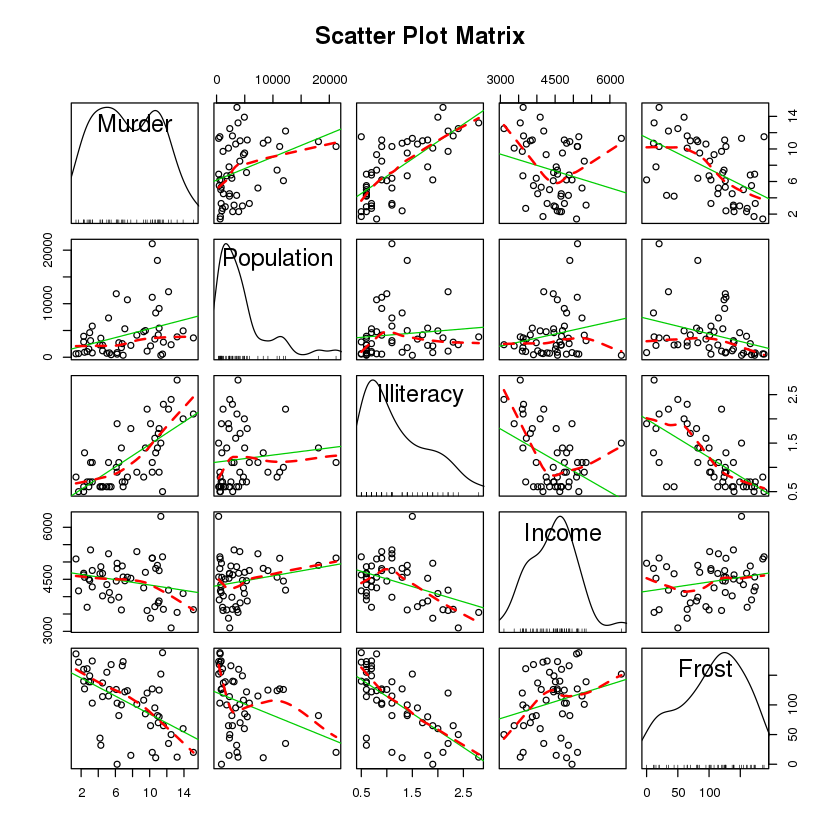

In [5]:
#to visually see these correlations, we can generate scatterplots as follows:
# install.packages("car") #in case you don't have the "car" package installed
library(car) #load the "car" package to access the scatterplotMatrix() function
scatterplotMatrix(states, #data to be plotted
                  spread = FALSE, #this option suppresses spread and asymmetry information
            smoother.args = list(lty = 2), #specifies that the loess fit be rendered as a dashed line
                 main = "Scatter Plot Matrix") #main heading

In [6]:
#by default, the scatterplotMatrix() function provides scatter plots of the variables
#with each other in the off-diagonals and superimposes smoothed (loess) and linear fit
#lines on these plots.  the principal diagonal contains density and rug plots for each variable.

#you can see that the murder rate may be bimodal and that each of the predictor variables
#are skewed to some extent

#murder rates rise with population and illiteracy and fall with income and frost

#colder states have lower illiteracy rates, lower population and higher incomes

In [7]:
#now we can fit an lm() function as follows:
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
summary(fit)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


In [8]:
#print the coefficients
coefficients(fit)

(Intercept)   Population   Illiteracy       Income        Frost 
1.2345634112 0.0002236754 4.1428365903 0.0000644247 0.0005813055

In [9]:
#when there is more than one predictor variable, the regression coefficients
#indicate the increase in the dependent variable for a unit change in a
#predictor variable, holding all other predictor variables constant
#for example, the regression coefficient for illiteracy is 4.14,
#suggesting that an increase of 1% in illiteracy is associated with a 4.14% increase
#in the murder rate, controlling for population, income and temperature.

#the illiteracy coefficient is significantly different from zero at the p < 0.001 level
##the p-value is the probability of obtaining the sampled results, assuming independence of
     #the illiteracy and murder rate variables.
#because p-value < 0.001, you reject the hypothesis that illiteracy and murder rate are independent!

#on the other hand, frost is NOT significantly different from zero p = 0.954
#the p-value is the probability of obtaining the sampled results, assuming independence of
#the frost and murder rate variables.
#because p-value > 0.1, you accept the hypothesis that frost and murder rate are independent!
#this suggests that frost and murder rate are not linearly related when controlling for
#the other predictor variables.

#as indicated by multiple R-squared, taken together, the predictor variables account for
#57% of the variance in murder rates across states.

### Multiple linear regression with interactions

In [4]:
#so far we have assumed that predictor variables do not interact with each other.
#however, this is not necessarily true as we can see in the following code:
fit <- lm(mpg ~ hp + wt + hp:wt, data = mtcars) #here mpg is the response variable
#hp, wt and the interaction between hp and wt (hp:wt) are the predictor variables
#the dataset is the "mtcars" dataset that is provided with the base R installation
summary(fit) #summary of the results
coefficients(fit) #prints out the coefficients


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


(Intercept)          hp          wt       hp:wt 
49.80842343 -0.12010209 -8.21662430  0.02784815

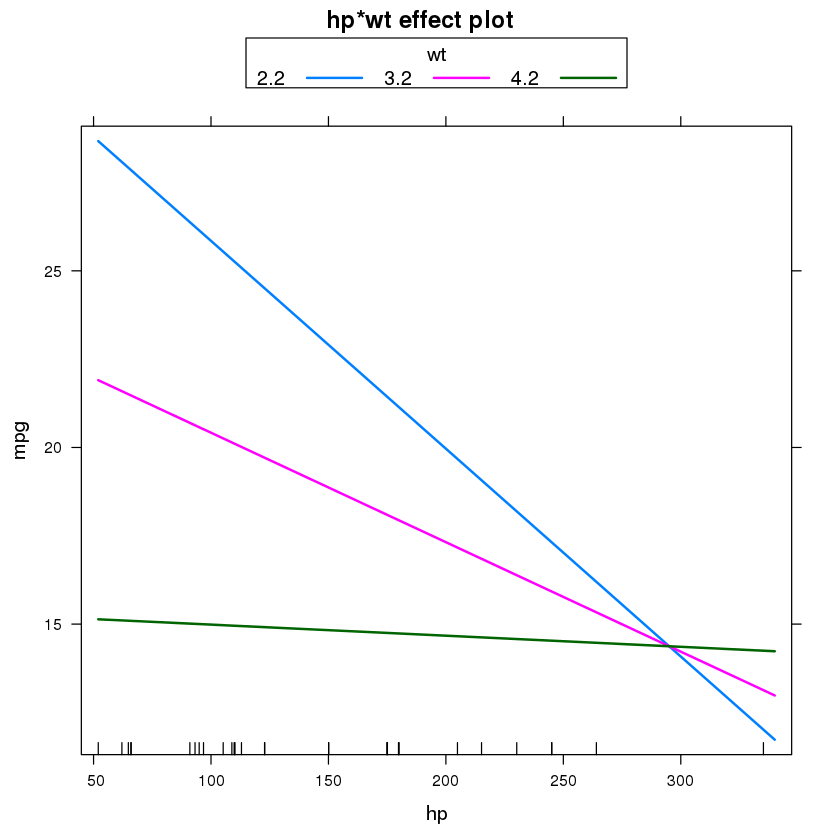

In [10]:
#you can see from the "Pr(>|t|)" column that the interaction between
#hp and wt is significant (p-value = 0.000811)
#the coefficient is significantly different from zero at the p < 0.001 level
##the p-value is the probability of obtaining the sampled results, assuming independence of
#the interaction between hp and wt and the response variable mpg
#because p-value < 0.001, you reject the hypothesis that mpg and hp:wt are independent!

#this means that the relationship between one predictor and the response variable depends
#on the level of the other predictor.  here it means that the relationship between
#mpg and hp depends on wt

#the model for predicting mpg is as follows:
# predictedMpg = 49.81 - 0.12 * hp - 8.22 * wt + 0.03 * hp * wt

#you can plug in various value of wt into this equation to examine the impact
#you can visualize the impacts using the effect() function in the effects package
#the code is provided below:

#install.packages("effects") #install the "effects" package
library(effects) #load the effects library
myEffect <- effect("hp:wt", #this is the term we want to plot; i.e. the terms whose interaction we want to visualize
                  fit,, #this is the fitted model returned by lm()
                  list(wt = c(2.2, 3.2, 4.2))) #list specifying the variables to be set to constant values and the values to employ
plot(myEffect, multiline = T) #multiline = TRUE superimposes the lines being plotted

In [8]:
#you can see from this graph that as the weight of the car increases, the relationship
#between horsepower and miles per gallon weakens.  For wt = 4.2, the line is almost horizontal,
#indicating that as hp increases, mpg does not change.

## Regression diagnostics

In [14]:
#to properly interpret the coefficients of the OLS model, you must satisfy
#a number of statistical assumptions:

#1. Normality: for fixed values of the independent variables, the dependent variable
    #is normally distributed

#2. Independence: the predicted values of the dependent variable are independent of each other

#3. Linearity: the dependent variable is linearly related to the independent variables

#4. Homoscedasticity: the variance of the dependent variable does not vary with the
    #levels of the independent variables.  Aka "constant variance".

In [16]:
#let us look at the output from the confint() function applied to the "states"
#multiple regression problem:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")]) #create the data frame
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states) #specify the lm() function
summary(fit) #print a summary of the lm() function
coefficients(fit) #print the coefficients from the lm() function
confint(fit) #print the confidence intervals of the lm() function


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


(Intercept)   Population   Illiteracy       Income        Frost 
1.2345634112 0.0002236754 4.1428365903 0.0000644247 0.0005813055

,2.5 %,97.5 %
(Intercept),-6.552191e+00,9.0213182149
Population,4.136397e-05,0.0004059867
Illiteracy,2.381799e+00,5.9038743192
Income,-1.312611e-03,0.0014414600
Frost,-1.966781e-02,0.0208304170


In [3]:
#the results above suggest inter-alia that you can be 95% confident:
#1. that the interval [2.38, 5.9] contains the true change in the murder rate for a 1% change in illiteracy rate;
#2. that because the interval for Frost contains 0, you can conclude that a change in temperature is unrelated
    #to murder rate, holding the other variables constant.

#However, your faith in these results is only as strong as the evidence you have that your data satisfies the
#statistical assumptions underlying the model, i.e. normality, independence, linearity and homoscedasticity.

#a set of techniques called "Regression Diagnostics" provides the necessary tools for evaluating the appropriateness
#of the regression model and can help you uncover and correct problems.

### A typical approach to regression diagnostics

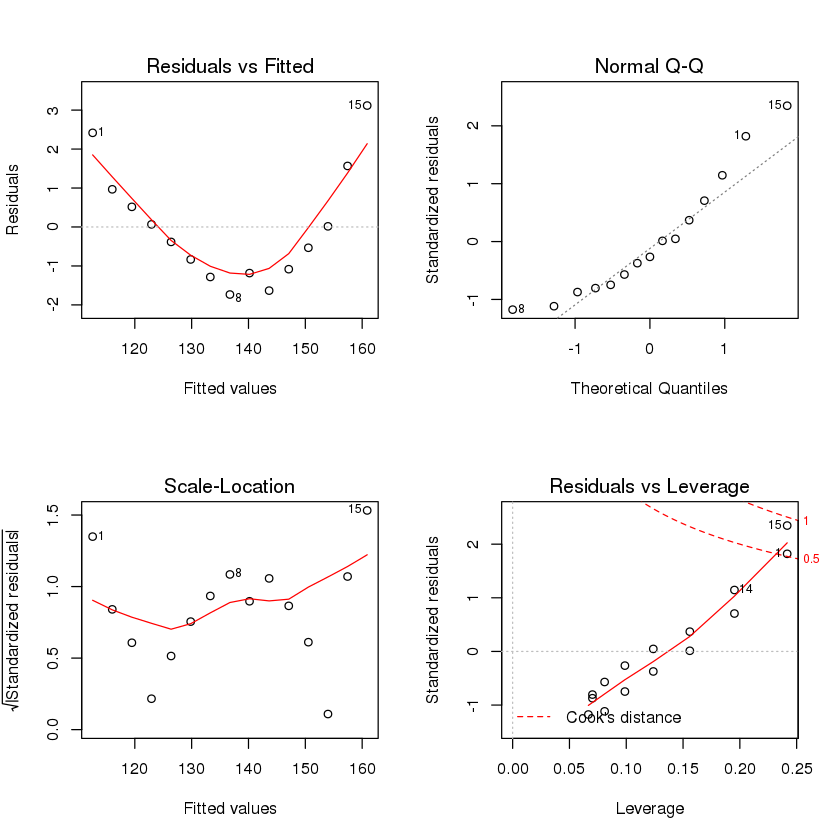

In [4]:
#the most common approach is to use the plot() function to the object returned by lm() as shown below:
fit <- lm(weight ~ height, data = women) #store the results of the lm() function in the fit object
par(mfrow = c(2,2)) #create a 2X2 matrix to store the plots generated by the plot() function
plot(fit) #generate the plots

In [5]:
#let us evaluate these charts against each of the assumptions of OLS regression:

#1. Normality: if a dependent variable is normally distributed for a fixed set of
    #predictor values, then the residual values should be normally distributed with
    #a mean of 0.  The Normal Q-Q plot (upper right) is a probability plot of the
    #standardized residuals against the values that would be expected under normality.
    #if you have met the normality assumption, the points on this graph should fall on
    #the straight 45-degree line.  Because they do not, you have clearly violated the
    #normality assumption.

#2. Independence: you cannot tell if the dependent variables are independent from these
    #plots.  You have to use your understanding of how the data was collected.  There's
    #no apriori reason to believe that one woman's weight influences another woman's
    #weight.  If you found out that the data were sampled from families, you might have
    #to adjust your assumption of independence.

#3. Linearity: if the dependent variable is linearly related to the independent variables,
    #there should be no systematic relationship between the residuals and the predictied
    #(fitted) values.  In other words, the model should capture all the systematic variance
    #present in the data, leaving nothing but random noise.  In the Residuals v/s Fitted
    #graph (upper left), you see clear evidence of a curved relationship, which suggests
    #you may want to add a quadratic term to the regression.

#4. Homoscedasticity: if you have met the constant variance assumption, the points in
    #the Scale - Location graph (bottom left) should be a random band around a horizontal
    #line.  You seem to meet this assumption.

#Finally, the Residuals v/s Leverage graph (bottom right) provides information about
#individual observations that you may wish to attend to.  The graph identifies outliers,
#high-leverage points and influential observations.  Specifically:

    #an outlier is an observation that is not predicted well by the fitted regression
    #model (i.e. it has a large positive or negative residual)

    #an observation with a high leverage value has an unusual combination of predictor
    #values.  That is, it is an outlier in the predictor space.  The dependent variable
    #value is not used to calculate an observation's leverage

    #an influential observation is an observation that has a disproportionate impact on
    #the determination of the model parameters.  Influential observations are identified
    #using a statistic called Cook's distance or Cook's D.

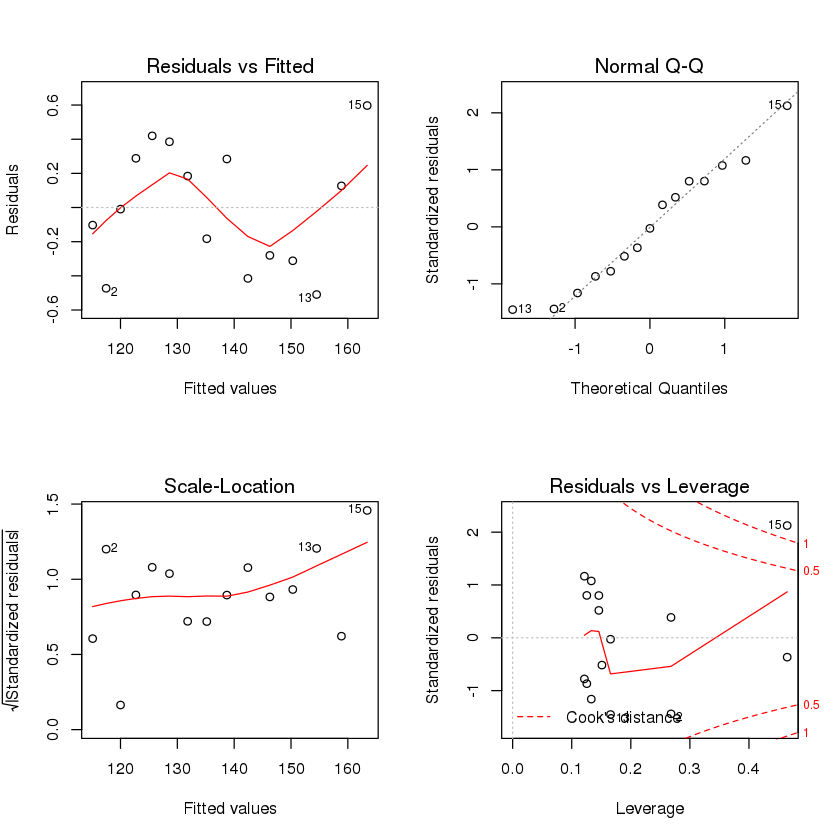

In [6]:
#let us review diagnostic plots for the quadratic fit using the following code:
fit2 <- lm(weight ~ height + I(height ^ 2), data = women) #store the results of the lm() function in the fit2 object
par(mfrow = c(2,2)) #create a 2X2 matrix to store the plots generated by the plot() function
plot(fit2) #generate the plots

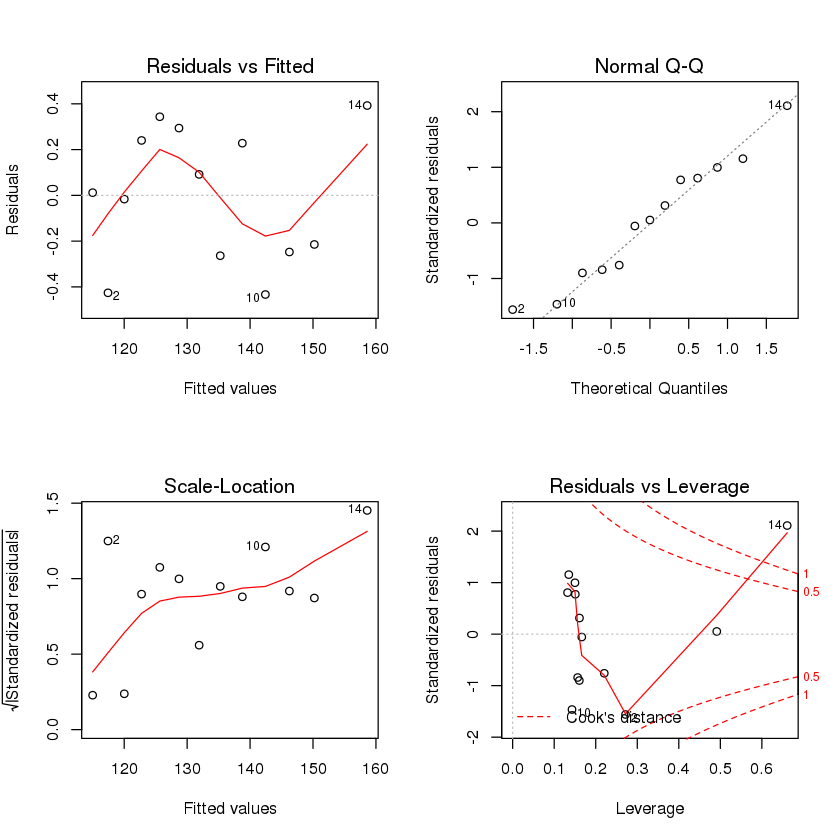

In [7]:
#this set of plots suggests that the polynomial regression provides a better fit with regard
#to the linearity assumption, normality of residuals (except of observation 13), and
#homoscedasticity (constant residual variance).  Observation 15 appears to be influential
#(based on a large Cook's D value), and deleting it has an impact on the parameter estimates.

#let's try deleting these values and evaluate model fit (you need to be careful when deleting data;
#your models should fit your data, not the other way around!)

fit3 <- lm(weight ~ height + I(height ^ 2), data = women[-c(13, 15),]) #store the results of the lm() function in the fit3 object
par(mfrow = c(2,2)) #create a 2X2 matrix to store the plots generated by the plot() function
plot(fit3) #generate the plots

In [8]:
#let us evaluate these plots:

#Normality: most of the points in the Normal Q-Q chart (upper right) fit on the 45 degree line which
            #satisfies this assumption

#Independence: as indicated above, you cannot tell if the dependent variables are independent from these
               #plots.

#Linearity: the points in the Residuals v/s Fitted chart (upper left) appear to be random which
            #satisfies this assumption

#Homoscedasticity: the points in the Scale - Location graph (bottom left) appear to be random which
                   #satisfies this assumption

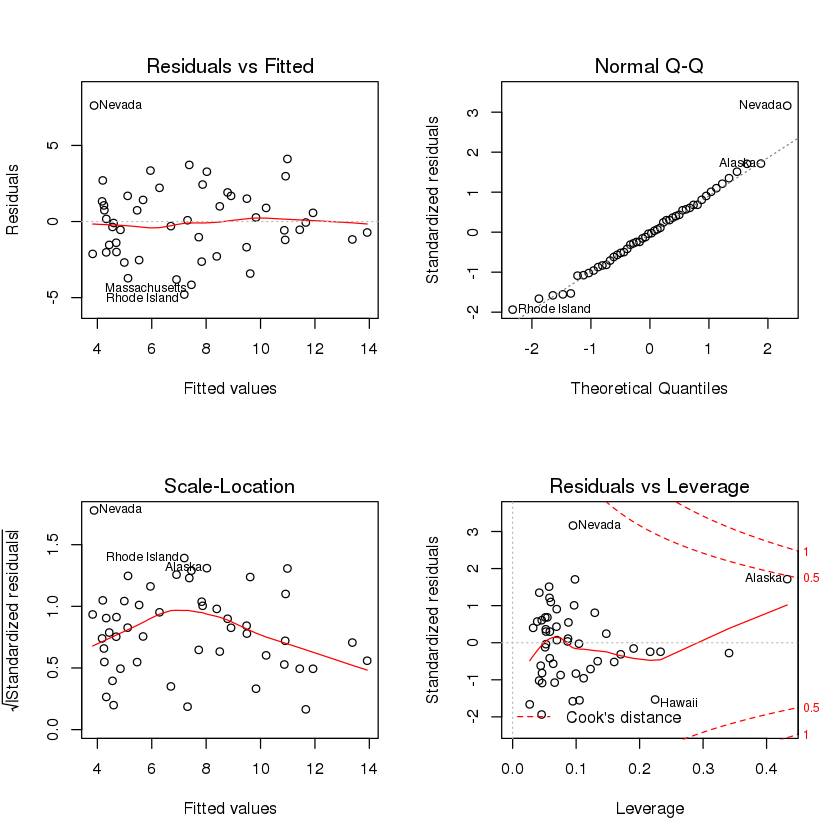

In [9]:
#one more example
#let's apply these tests to the states multiple regression problem
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")]) #create the data frame
fit4 <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states) #store the results of the lm() function in the fit4 object
par(mfrow = c(2,2)) #create a 2X2 matrix to store the plots generated by the plot() function
plot(fit4) #generate the plots

In [10]:
#let us evaluate these plots:

#Normality: most of the points in the Normal Q-Q chart (upper right) fit on the 45 degree line which
            #satisfies this assumption

#Independence: as indicated above, you cannot tell if the dependent variables are independent from these
               #plots.

#Linearity: the points in the Residuals v/s Fitted chart (upper left) appear to be random which
            #satisfies this assumption

#Homoscedasticity: the points in the Scale - Location graph (bottom left) appear to be random which
                   #satisfies this assumption

#From the Residuals v/s Leverage plot (bottom right), Nevada appears to be an outlier.

### An enhanced approach to regression diagnostics

In [11]:
#the "car" and "gvlma" R packages provide many functions() to test linear regression model assumptions.
#let us first install these packages and then dive in to the details
#install.packages("car") #install the "car" package
library(car) #load car package
#install.packages("gvlma") #install the "gvlma" package
library(gvlma) #load gvlma package

#### Normality

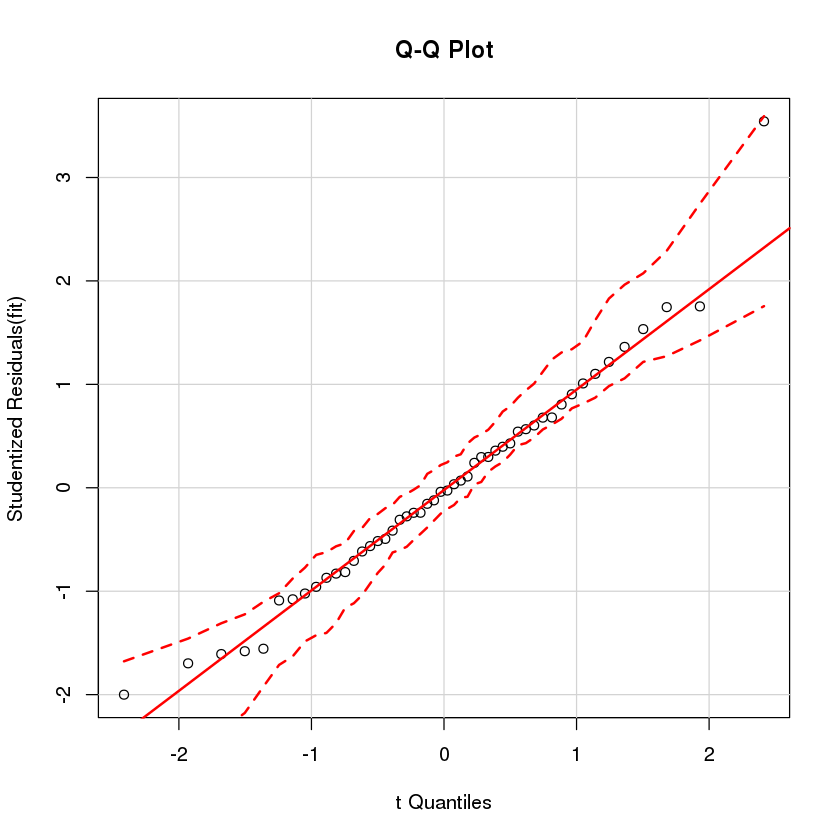

In [4]:
#the qqPlot() function in the "car" package provides a method to evaluate normality
#it plots the studentized residuals (also called studentized deleted residuals or jackknifed residuals)
#against a t-distribution with n - p - 1 degrees of freedom, where n is the sample size, p is the
#number of regression parameters (including the intercept).  the code follows:
library(car) #load the car package
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                    "Illiteracy", "Income", "Frost")]) #create the dataset
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states) #store the lm() model in the fit object
qqPlot(fit, labels = row.names(states), #id.method = "identify",
      simulate = T, main = "Q-Q Plot") #simulate = T produces a 95% confidence envelope using a parametric bootstrap

In [71]:
#from the above, you can tell that there is an outlier at the top right corner of the graph
#by running the "which.max" and "residuals" functions, we can identify the outlier
which.max(residuals(fit))
max(residuals(fit))

Nevada 
    28

[1] 7.621042

In [72]:
#from the above, we can see that our model underestimates the murder rate in Nevada significantly
#the residual of 7.62 = the actual murder rate LESS the fitted murder rate
#apart from Nevada, the fitted values of most other states are very close to the actual value

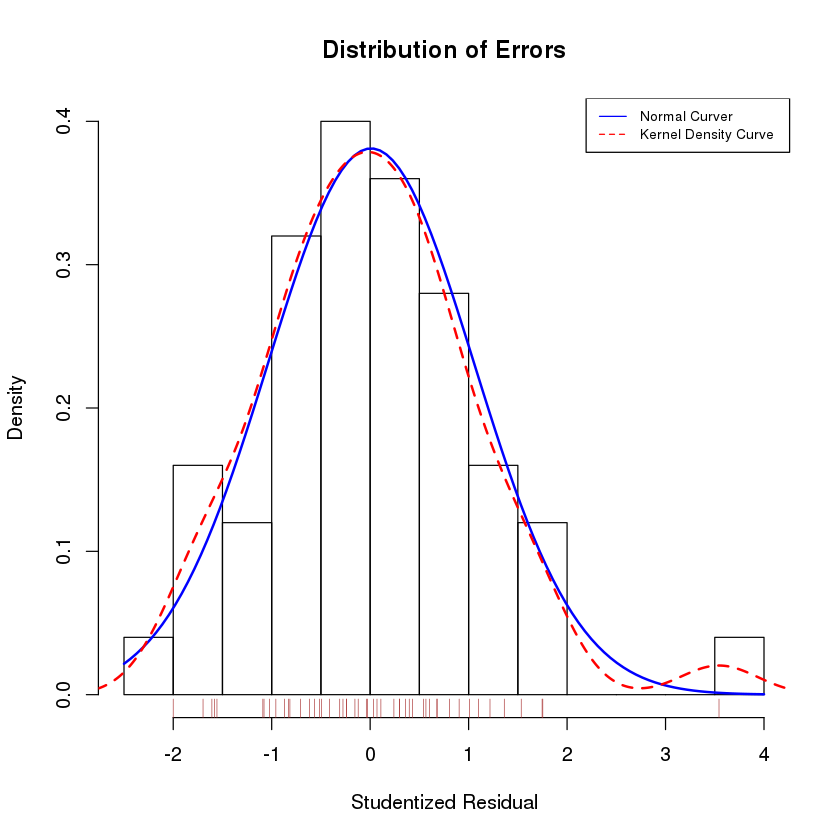

In [73]:
#another way of visualizing errors is as follows:
residplot <- function(fit, nbreaks = 10) { #define the function "residplot" with 2 parameters
                                           #fit = an lm() function; nbreaks = number of breaks (default = 10)
    z <- rstudent(fit) #calculate the studentized residuals and store it in object z
                       #for more information on studentized residuals, see https://en.wikipedia.org/wiki/Studentized_residual
    hist(z, #create a histogram of the studentized residuals
         breaks = nbreaks, #with breaks = nbreaks (10; default)
         freq = F, #"freq = FALSE" crates a plot based on probability densities rather than frequencies
         xlab = "Studentized Residual", #x-axis label
         main = "Distribution of Errors") #name of the plot
    rug(jitter(z), #rug() creates a set of tick marks along the base of a plot
                   #using the jitter() function which couterintuitively adding random noise
                   #to a plot can sometimes make it easier to read.
                   #Jittering is particularly useful for small datasets with at least one discrete position
       col = "brown") #color of the tick marks
    curve(dnorm(x, #superimposes a normal curve created using the dnorm() function
               mean = mean(z), #mean of the normal distribution
               sd = sd(z)), #sd of the normal distribution
         add = T, #superimposes the curve
         col = "blue", #color of the curve
         lwd = 2) #width of the line
    lines(density(z)$x, density(z)$y, #adds a kernel density curve
         col = "red", #color of the curve
         lwd = 2, #line width
         lty = 2) #line type = dashed
    legend("topright", #adds legend to the top right of the plot
          legend = c("Normal Curver", "Kernel Density Curve"), #provides a vector with legend labels
          lty = 1:2, #provides the line types for the legend (normal, dashed)
          col = c("blue", "red"), #colors of the legend
          cex = 0.7) #ratio of size of the legend compared to the rest of the plot
}
residplot(fit) #create the plot using the "residplot" function

In [65]:
#as you can see from the plot above, the errors / residuals follow a normal distribution
#quite well, with the exception of a large outlier (Nevada)

#### Independence of errors

In [74]:
#as indicated earlier, the best way to assess whether the dependent variable values (and thus, the residuals)
#are independent is from your knowledge of how the data were collected.  For example, time series data
#often display autocorrelation - observations collected closer in time are more correlated with each other
#than with observations distant in time.  The "car" package provides a function for the Durbin-Watson test
#to detect such serially correlated errors.  You can apply the Durbin-Watson test to the multiple-regression
#problem with the following code:
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691   0.282
 Alternative hypothesis: rho != 0

In [76]:
#the non-significant p-value (p = 0.282) suggests a lack of autocorrelation and, conversely,
#an independence of errors.  The lag value (1 in this case) indicates that each observation is
#being compared with the one next to it in the dataset.  Although appropriate for time-dependent data
#this test is less applicable for data that isn't clustered in this fashion.  Note that the
#durbinWatsonTest() function uses bootstrapping to derive p-values.  Unless you add the option
#simulate = FALSE, you will get a slightly different value each time you run the test.
#for understanding p-values better, see
#http://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/

#### Linearity

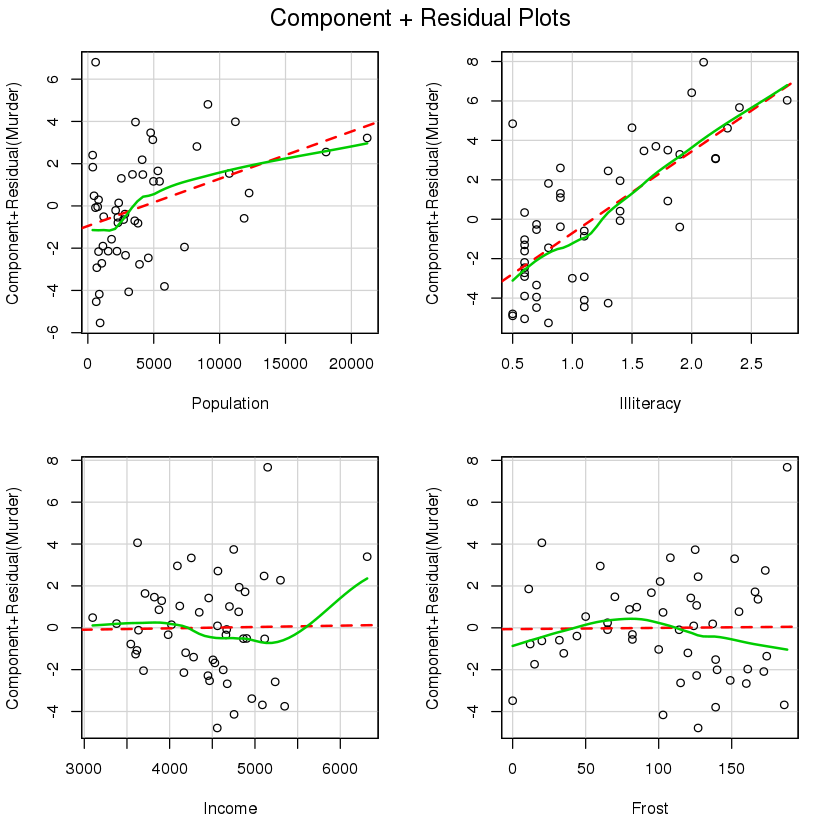

In [77]:
#you can look for evidence of nonlinearity in the relationship between the dependent variable
#and the independent variables by using component plus residual plots (aka partial residual plots):
library(car)
crPlots(fit)

In [78]:
#nonlinearity in any of these plots suggests that you may not have adequately modeled the functional
#form of that predictor in the regression.  If so, you may need to add curvilinear components such
#as ploynomial terms, transform one or more variables (for example, use log(x) instead of x),
#or abandon linear regression in favor of some other regression variant.

#### Homoscedasticity

In [79]:
#assessing homoscedasticity using the ncvTest():
library(car)
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514    Df = 1     p = 0.1863156 


Suggested power transformation:  1.209626 

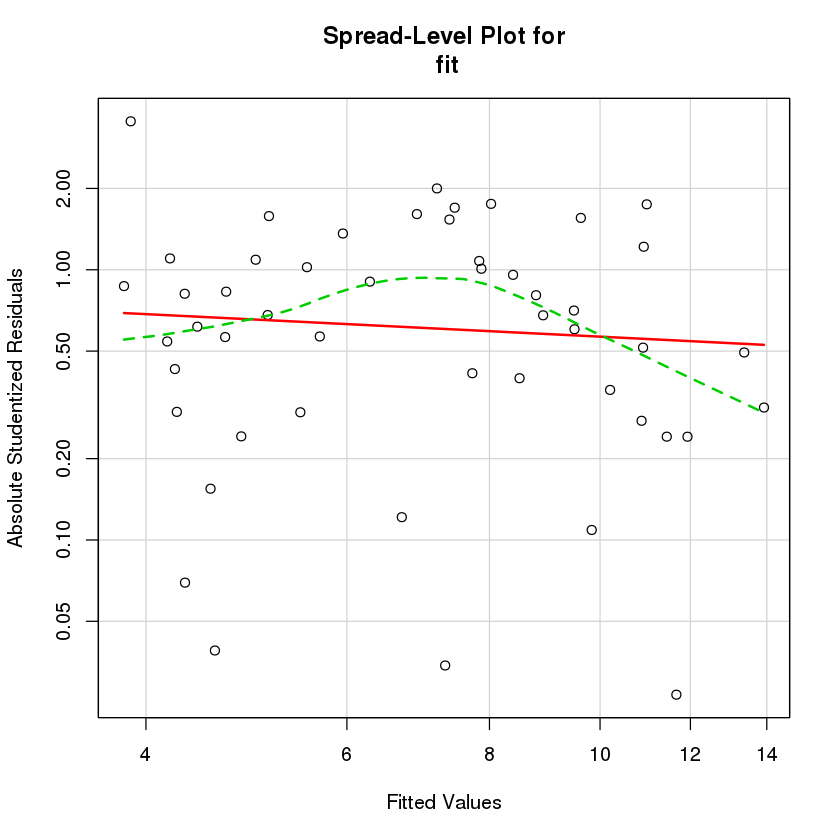

In [81]:
#the score test is nonsignificant (p = 0.19) suggesting that you have met the constant variance assumption
#you can also see this in a spread-level plot below:
spreadLevelPlot(fit)

In [82]:
#the points in the plot above form a random horizontal band around a horizontal line
#of best fit.  The suggested power transformation is the suggest power p (Y^p) tha would
#stabilize the nonconstant error variance.  For example, if the plot showed a nonhorizontal
#trend and the suggested power transformation was 0.5, then using sqrt(Y) instead of Y
#might lead to a model that satisfied homoscedasticity.  If the suggested power was 0,
#you would use a log transformation.  In the current example, there is no evidence of
#heteroscedasticity, and the suggested power is close to 1 (no transformation required)

### Global validation of linear model assumption

In [83]:
#the gvlma() function provides a single omnibus (go / no go) test of model assumptions:
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                    Value p-value                Decision
Global Stat        2.7728  0.5965 

In [84]:
#you can see from the Global Stat line that the data meets all the statistical assumptions
#that go with the OLS regression model (p = 0.597)

### Multicollinearity

In [87]:
#to understand multicollinearity, see https://en.wikipedia.org/wiki/Multicollinearity
#you can detect multicollinearity using a statistic called the variance inflation factor (VIF).
#for any predictor variable, the square root of the VIF indicates the degree to which the
#confidence interval for that variable's regression parameter is expanded relative to a model
#with uncorrelated predictors.  As a general rule, sqrt(vif) > 2 indicates a multicollinearity
#problem.  You can see from the code below, that our model does not have a multicollinearity problem
library(car)
vif(fit)
sqrt(vif(fit)) > 2 # problem?

Population Illiteracy     Income      Frost 
  1.245282   2.165848   1.345822   2.082547

Population Illiteracy     Income      Frost 
     FALSE      FALSE      FALSE      FALSE

## Unusual observations

In [2]:
#a comprehensive regression analysis will include screening for unusual observations, namely
#outliers, high-leverage observations and influential observations.

### Outliers

In [5]:
#outliers are observations that are not well predicted by the model.  They have unusually large
#positive or negative residuals.  The "car" package provides the outlierTest() function to detect
#outliers.  It reports the Bonferroni adjusted p-value for the largest absolute studentized residual
library(car)
outlierTest(fit)

       rstudent unadjusted p-value Bonferonni p
Nevada 3.542929         0.00095088     0.047544

In [6]:
#from the above, we can see that Nevada has been identified as an outlier (p = 0.048)
#if it isn't significant, there are no outliers in the dataset
#if it is significant, you must delete the outlier and re-run the test to see if other
#outliers are present.

### High-leverage points

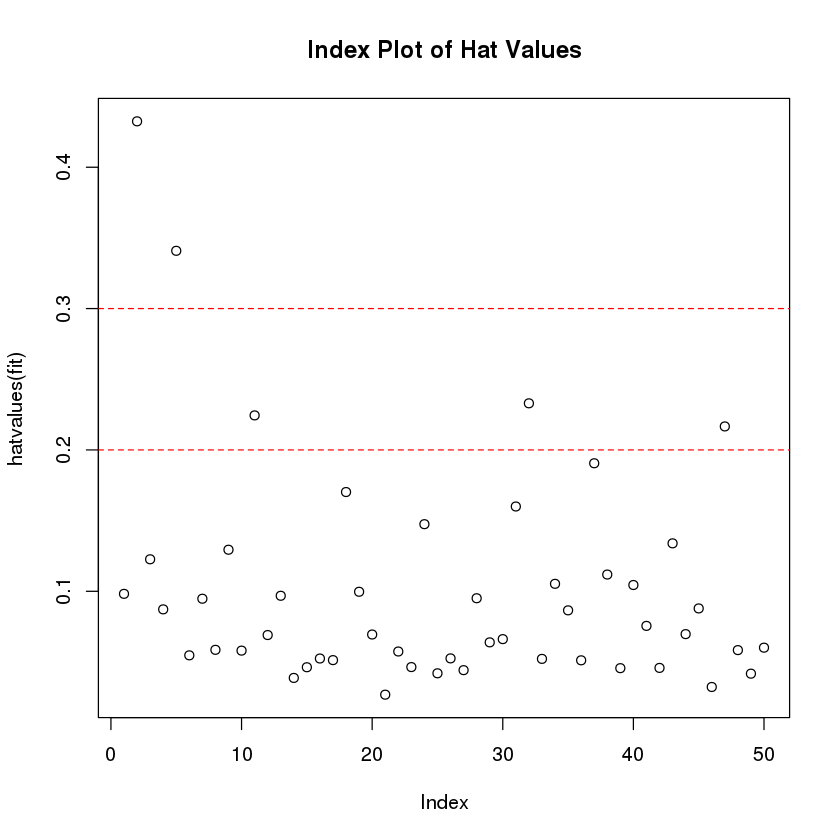

In [7]:
#observations that have high leverage are outliers with regard to other predictors.
#in other words, they have an unusual combination of predictor values.  the response
#value is not involved in determining leverage.

#observations with high leverage are identified through the "hat statistic".  For a given
#dataset, the average hat value is p / n where p = number of parameters estimated in the model
#(including the intercept) and n is the sample size.  Roughly speaking, an observation with a
#hat value > 2x or 3x the average hat value should be examined.  here's an example:

hat.plot <- function(fit) { #define a function to create a hat plot
    p <- length(coefficients(fit)) #p = number of parameters estimated in the model (including the intercept)
    n <- length(fitted(fit)) #n = sample size
    plot(hatvalues(fit), #plot the hatvalues()
         main = "Index Plot of Hat Values") #title of the plot
    abline(h = c(2, 3) * p / n, #add lines at 2x and 3x times p / n
          col = "red", #line color
          lty = 2) #line type = dashed
    #identify(1:n, 
             #hatvalues(fit), 
            #names(hatvalues(fit)))
}
hat.plot(fit)

In [22]:
#to identify which 5 states have hat values in excess of 0.2, we can use the following code:
hatval <- hatvalues(fit)
hatval[hatval > 0.2]

Alaska California     Hawaii   New York Washington 
 0.4324732  0.3408763  0.2244359  0.2329864  0.2166290

In [23]:
#you can see that Alaska and California are particularly unusual when it comes to their
#predictor values.  Alaska has a much higher income than other states, while having a
#lower population and temperature.  California has a much higher population that other
#states while having a higher income and higher temperature.  These are atypical compared
#to the other 48 states.

#high-leverage observations may or may not be influential observations.  That will depend
#on whether they are also outliers.

### Influential observations

In [24]:
#influential observations have a disproportionate impact on the values of the model parameters.
#imagine finding that your model changes dramatically with the removal of a single observation.
#it is this concern that leads you to examine your data for influential points.

#there are two methods for identifying influential observations:
#Cook's distance (or D statistic); and
#added variable plots

#### Cook's distance (aka D statistic)

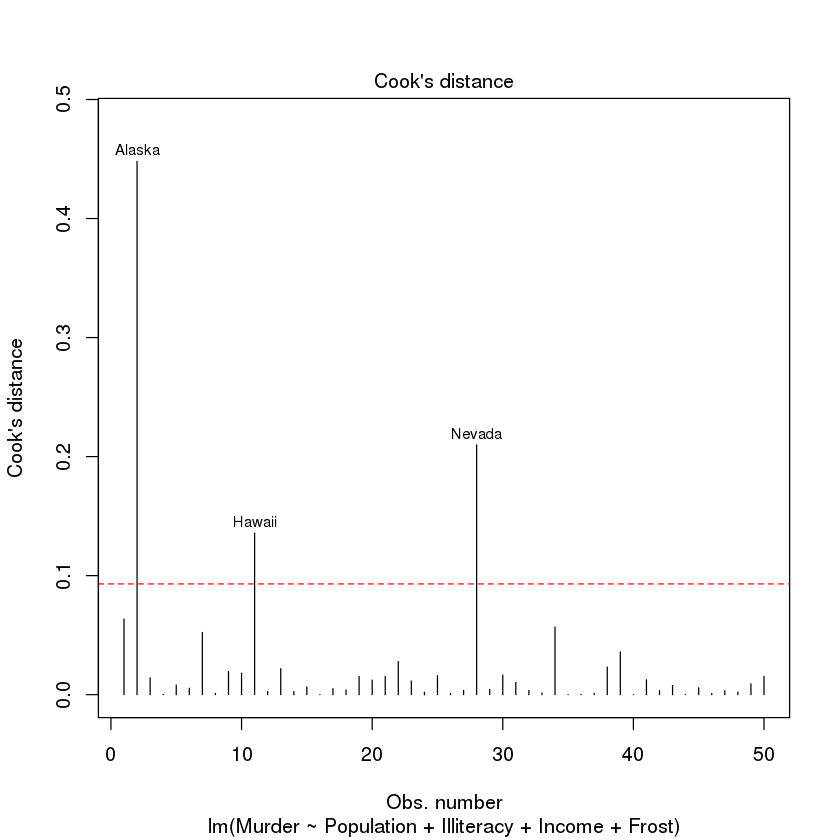

In [37]:
#roughly speaking, Cook's D values > 4 / (n - k - 1) indicate influential observations, where:
#n = sample size; k = number of predictor variables

#you can create a Cook's D plot with the following code:
cutoff <- 4 / (nrow(states) - length(fit$coefficients) - 2) # we use -2 instead of -1 since there are 2 degrees of freedom
plot(fit, #we plot the lm() function stored in the "fit" object
    which = 4, #which = 1 = Residuals v/s Fitted; 2 = Normal Q-Q; 3 = Scale-Location; 4 = Cook's distance
               #which = 5 = Residuals vs Leverage; 6 = Cook's dist vs Leverage
    cook.levels = cutoff) #specify the cutoff levels
abline(h = cutoff, #add a line at the cutoff value
      lty = 2, #line type = dashed
      col = "red") #line color = red

In [38]:
#the chart above identifies Alaska, Hawaii and Nevada as influential observations.
#deleting these states will have a notable impact on the values of the intercept
#and slopes in the regression model.

#### Added variable plots

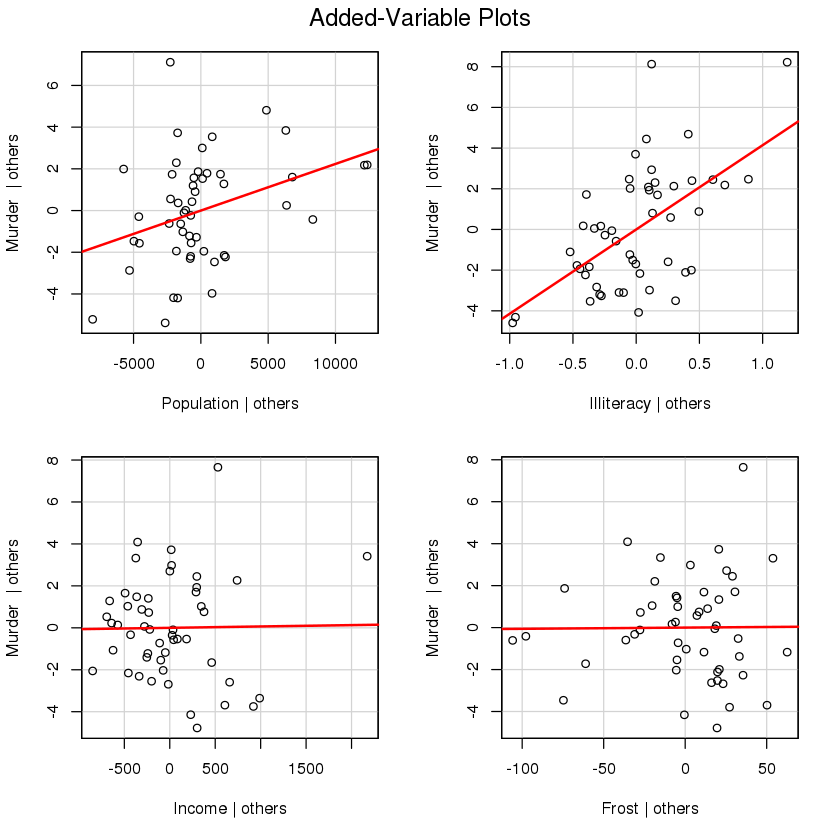

In [43]:
#Cook's D plots can help identify influential observations but they do not provide
#information on how these observations affect the model.  Added variable plots can help
#with this.  For one response variable and k predictor variables, you would create
#k added-variable plots as follows:
#for each predictor Xk, plot the residuals from regressing the response variable on the
#other k - 1 predictors versus the residuals from regressing Xk on the other k - 1 predictors.

#added-variable plots can be created using the following code:
library(car)
avPlots(fit, 
        ask = F) #If TRUE, ask the user before drawing the next plot; if FALSE don't ask

In [44]:
#the straight line in each plot is the actual regression coefficient for that predictor variable.
#you can see the impact of influential observations by imagining how the line would change
#if the point representing that observation were deleted.

#### Influence plot

,StudRes,Hat,CookD
Alaska,1.753692,0.43247319,0.4480510
Nevada,3.542929,0.09508977,0.2099157


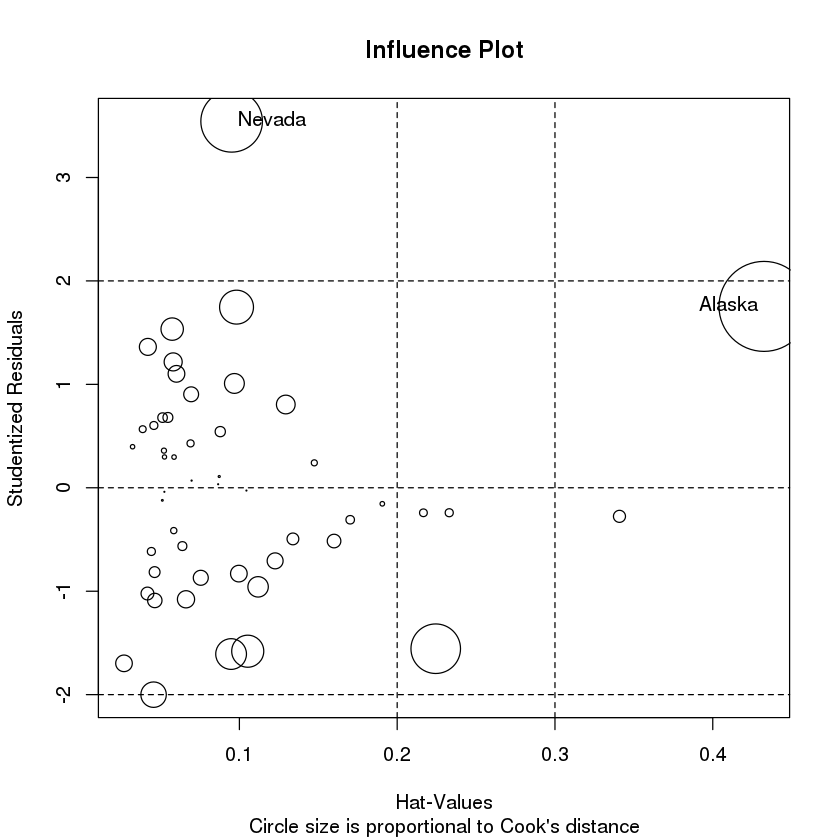

In [46]:
#you can combine information from the outlier, leverage and influence plots into one
#highly informative plot using the following code:
library(car)
influencePlot(fit, #data for the plot
              id.method = "mahal", #treat (x, y) as if it were a bivariate sample, 
                                   #and select cases according to their 
                                   #Mahalanobis distance from (mean(x), mean(y))
                                   #for more info on id.method, see https://www.rdocumentation.org/packages/car/versions/2.1-5/topics/showLabels
                                   #for more information on Mahalanobis distance, see https://en.wikipedia.org/wiki/Mahalanobis_distance
              main = "Influence Plot", #main heading of the plot
             sub = "Circle size is proportional to Cook's distance") #sub heading of the plot

## Corrective measures

In [48]:
#there are four approaches to dealing with violations of regression assumptions:
#1. deleting observations
#2. transforming variables
#3. adding or deleting variables
#4. using another regression approach

### Deleting observations

In [51]:
#deleting outliers and influential observations can improve a dataset's fit to the
#normality assumption.  Instances where deleting observations are OK include:
#there were data errors in recording, a protocol was not followed, or a test subject
#misunderstood instructions.
#in other cases, the unusual observation may be the most interesting thing about the data
#and may contribute to great insight on the topic at hand and to other topics you may
#not have thought of, so it is:

#important to exercise caution when considering the deletion of observations.

### Transforming variables

In [54]:
#when models do not meet the normality, linearity or homoscedasticity assumptions,
#transforming one or more variables can often improve the situation.
#transformations typically involve replacing a variable Y with Y^a.

#common values of a and their interpretations follow:
#a = -2; transformation: 1/(Y^2)
#a = -1; transformation: 1/Y
#a = -0.5; transformation: 1/sqrt(Y)
#a = 0; transformation: log(Y)
#a = 0.5; transformation: sqrt(Y)
#a = 1; transformation: none
#a = 2; transformation: Y^2

#if Y is a proportion, a logit transformation [ln (Y/1 - Y)] is often used

In [57]:
#when the model violates the normality assumption, you typically attempt a transformation
#of the response variable.  You can use the powerTransform() function in the "car" package
#to generate a maximum-likelihood estimation of the power "a", most likely to normalize
#the variable X^a.  for example:
library(car)
summary(powerTransform(states$Murder))

bcPower Transformation to Normality 
              Est Power Rounded Pwr Wald Lwr bnd Wald Upr Bnd
states$Murder    0.6055           1       0.0884       1.1227

Likelihood ratio tests about transformation parameters
                           LRT df       pval
LR test, lambda = (0) 5.665991  1 0.01729694
LR test, lambda = (1) 2.122763  1 0.14512456

In [58]:
#the results suggest that you can normalize the variable "Murder" by replacing it
#with Murder^0.6.  Because 0.6 is close to 0.5, you could try a sqrt transformation.
#however, in this case, the hypothesis a = 1 cannot be rejected (p = 0.145) so there
#is no strong evidence that a transformation is needed.

In [59]:
#when the assumption of linearity is violated, a transformation of the predictor variables
#can often help.  You can use the boxTidwell() function for this as follows:
library(car)
boxTidwell(Murder ~ Population + Illiteracy, data = states)

           Score Statistic   p-value MLE of lambda
Population      -0.3228003 0.7468465     0.8693882
Illiteracy       0.6193814 0.5356651     1.3581188

iterations =  19 

In [60]:
#the results suggest that trying Population ^ 0.87 and Illiteracy ^ 1.36 to achieve
#greater linearity.  But the p-values of Population (0.75) and Illiteracy (0.54) suggest
#that neither variable needs to be transformed.

In [61]:
#when the assumption of homoscedasticity is violated, the transformation of the response
#variable can help.  You can use the spreadLevelPlot() function in the "car" package for this.

In [62]:
#remember, if you transform your variables, your interpretations must be based on the
#transformed variables, not the original variables.  If a transformation does not make
#sense, you should avoid it.

### Adding or deleting variables

In [63]:
#sometimes adding or deleting variables can improve model fit.

#deleting variables is a particularly important approach for dealing with multicollinearity.
#if your goal is to only make predictions, then multicollinearity is not a problem.
#however, if you want to make interpretations about individual predictor variables, 
#then you must deal with multicollinearity.

#the most common approach is to delete one of the variables involved in multicollinearity
#(i.e. one of the variables with a sqrt(vif) > 2)

#an alternate approach is to use ridge regression
#for more information, see https://en.wikipedia.org/wiki/Tikhonov_regularization

### Trying a different approach

In [64]:
#the decision regarding when to improve the fit of an OLS regression model and when to
#try a different regression approach (eg ridge, robust, nonparametric, nonlinear, time-series,
#multi-level, generalized linear models, etc) is a complex one.
#it is typically based on knowledge of the subject matter and an assessment of which approach
#will provide the best result

## Selecting the "best" regression model

In [65]:
#all things being equal, if you have two models with approximately equal predictive accuracy,
#you should favor the simpler one.  The word "best" is in quotation marks because there is no
#single criterion you can use to make your decision.  that said here are some methods to help
#you choose which regression model to use.

### Comparing models

In [68]:
#you can compare the fit of two nested models using the anova() function in the base R installation.
#a nested model is one whose terms are completely included in the other model.
#here's an example of using the anova() function:
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit1 <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
fit2 <- lm(Murder ~ Population + Illiteracy, data = states)
anova(fit1, fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
45,289.1672,NA,NA,NA,NA
47,289.2457,-2,-0.07850518,0.006108462,0.993911


In [69]:
#here fit2 is completely nested in fit1.  the anova() function provides a simultaneous test
#that Income and Frost add to linear prediction above and beyond Population and Illiteracy.
#because the test is nonsignificant (p = 0.994), you can conclude that they do not add to
#the linear prediction and you are justified in dropping them from your model

In [70]:
#the Akaike Information Criterion (AIC) provides another method for comparing models.
#the index takes into account a model's statistical fit and the number of parameters needed to
#achieve this fit.  Models with smaller AIC values - indicating adequate fit with fewer
#parameters - are preferred.  See example below:
AIC(fit1, fit2)

,df,AIC
fit1,6,241.6429
fit2,4,237.6565


In [71]:
#AIC suggests that the model without Income and Frost is the better model.
#unlike the ANOVA approach, the AIC does NOT require nested models.

### Variable selection

In [72]:
#comparing two models is relatively straightforward.  however, often you have to compare many
#models if there are many different predictor variables.  Two popular methods for selecting
#a final set of predictor variables from a pool of larger candidiates are:
#1. stepwise regression; and
#2. all-subsets regression

#### Stepwise regression

In [73]:
#in stepwise selection, variables are added to or deleted from a model one at a time, until some
#stopping criterion is reached:

#in forward stepwise regression, you add predictor variables to the model one at a time, stopping
#when the addition of variables would no longer improve the model

#in backward stepwise regression, you start with a model that includes all predictor variables, and
#then you delete them one at a time until removing variables would degrade the quality of the model

#in stepwise stepwise regression, you combine the forward and backward approaches.  Variables are
#entered one at a time, but at each step, the variables in the model are reevaluated, and those that
#do not contribute to the model are deleted.  A predictor variable may be added to and deleted from a model
#several times before a final solution is reached.

#the stepAIC() function in the MASS package performs this task as follows:
library(MASS)
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
stepAIC(fit, direction = "backward")


Attaching package: ‘MASS’

The following object is masked from ‘package:SparkR’:

    select



Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


In [74]:
#as can be seen above, you start with all four predictors in the model.
#for each step, the AIC column provides the model AIC resulting from the
#deletion of the variable listed in that row.  The AIC value for <none>
#is the model AIC if no variables are removed.
#in step 1, frost is removed, decreasing the AIC from 97.75 to 95.75.
#in step 2, income is removed, decreasing the AIC from 95.75 to 93.76
#deleting any more variables would increase the AIC so the process stops.

#although stepwise regression may find a good model, there is no guarantee
#that it will find the "best" model because not every possible model is
#evaluated.  An approach that attempts to overcome this limitation is
#all subsets regression.

#### All subsets regression

In [2]:
#in all subsets regression, every possible model is inspected.  The analyst can choose to have
#all possible results displayed or ask for the nbest models of each subset size (one predictor,
#two predictors, and so on).

#all subsets regression is performed using the regsubsets() function from the "leaps" package
#you can choose R-squared, adjusted-R-squared or Mallows cp statistic as your criterion for
#choosing the best model

#R-squared is the amount of variance accounted for in the response variable by the predictor
#variables

#Adjusted R-squared is similar but takes into account the number of parameters in the model.
#R-squared always increases with addition of parameters.  When the number of predictors is large
#compared to the sample size, this can lead to significant overfitting.  The Adjusted R-squared
#is an attempt to provide a more honest estimate of the population R-squared - one that is less
#likely to take advantage of chance variation in the data

#a model with a Mallows cp statistic (https://en.wikipedia.org/wiki/Mallows%27s_Cp) that is close to the
#number of model parameters (including the intercept) is widely considered to be a good model

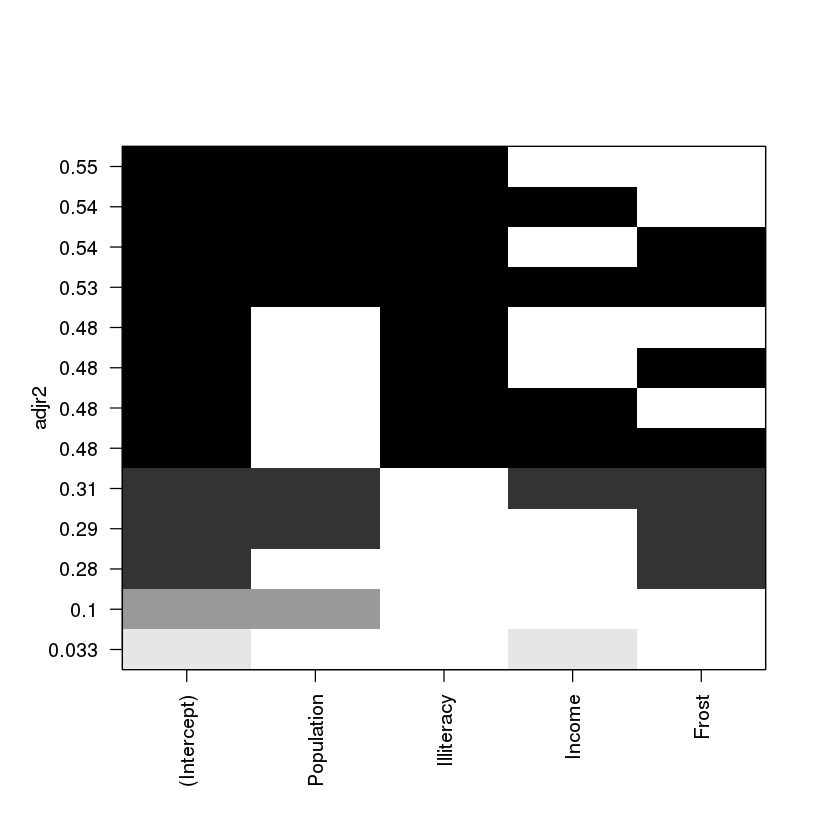

In [4]:
#example of all subsets regression:
#install.packages("leaps") #install the "leaps" package
library(leaps) #load the "leaps" package
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")]) #create the dataset
leaps <- regsubsets(Murder ~ Population + Illiteracy + Income + Frost, #create the regsubsets function
                   data = states, #based on the states dataset
                   nbest = 4) #the 4 best one-predictor models are displayed, followed by the 4 best 2-predictor models
                              #and so on until the best 4 models for each subset size are displayed
plot(leaps, #plot leaps
    scale = "adjr2") #based on the adjusted r-squared

In [5]:
#let us interpret the graph above
#looking at the first row (starting at the bottom), you can see that a model with the intercept
#and income has an adjusted r-squared of 0.033 where as a model with the intercept and population
#has an adjusted r-squared of 0.1.  jumping to the 12th row, you can see that a model with
#the intercept, population, illiteracy and income has an adjusted r-squared of 0.54, where as
#in row 13, a model with the intercept, population and illiteracy alone has an adjusted r-squared of 0.55
#i.e. a model with fewer predictors has a larger adjusted r-squared (something not possible with
#an unadjusted r-squared).  the graph suggests that the 2-predictor model (population and illiteracy)
#is the best one.

ERROR: Error in legend(if (!is.na(charmatch(legend[1], "interactive"))) locator(1) else if (is.character(legend)) legend else if (is.numeric(legend) && : invalid coordinate lengths


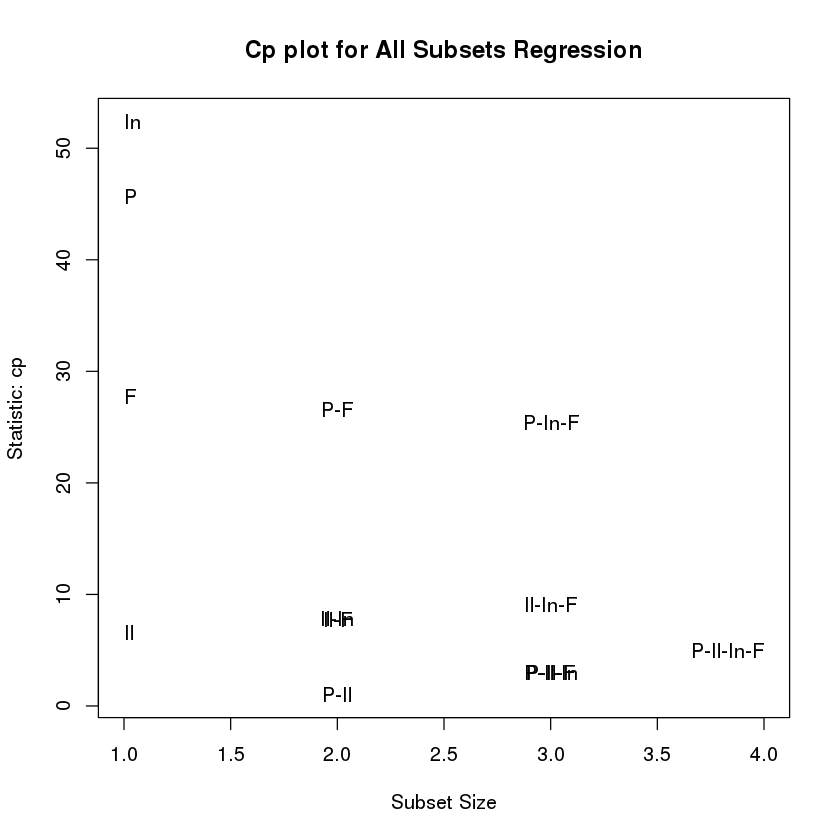

In [8]:
#another chart:
library(car) #load the "car" package
subsets(leaps,
       statistic = "cp",
       main = "Cp plot for All Subsets Regression")
abline(1, 1, lty = 2, col = "red")

In [9]:
#this plot also suggests that the best model is the one with 2-predictors
#P=Il i.e. Population and Illiteracy

In [10]:
#in most instances all subsets regression is preferable to stepwise regression,
#because more models are considered.  however, when the number of predictors is
#large, all subsets regression can take siginificant computing time.

#in general, automated variable selection methods should be seen as an aid rather
#than a directing force in model selection.  a well-fitting model that does not
#make sense does not help you.  ultimately, it is your knowledge of the subject
#matter that should guide you

## Taking the analysis further

### Cross-validation

In [11]:
#when the goal of your regression model is prediction, the most important question is:
#"how well will this equation perform in the real world?"
#cross-validation is a useful method for evaluating the generalizability of a regression
#equation

#in cross-validation, a portion of the data is selected as the training sample and a portion
#is selected as the hold-out sample.  a regression equation is developed on the training sample
#and then applied to the hold-out sample.  Because the hold-out sample was not involved in
#the selection of the model parameters, the performance on this sample is a more accurate
#estimate of the operating characteristics of the model with new data.

In [12]:
#in k-fold cross valiation, the sample is divided into k subsamples.  Each of the k subsamples
#serves as the hold-out group and the combined observations from the remaining k - 1 subsamples
#serve as the training group.  the performance for the k prediction equations applied to the
#k hold-out samples is recorded and then averaged.
#when k = n, the total number of observations, this approach is called "jackknifing"

In [17]:
#you can perform k-fold cross-validation using the crossval() function in the "bootstrap"
#package.  the following listing provides a function (called shrinkage()) for cross-validating
#a model's r-square statistic using k-fold cross-validation:

#install.packages("bootstrap")
library(bootstrap) #load the bootstrap package
shrinkage <- function(fit, k = 10) { #fit = regression equation; k = number of subsamples (default = 10)
    require(bootstrap) #load the bootstrap package
                       #see https://stackoverflow.com/questions/5595512/what-is-the-difference-between-require-and-library
    theta.fit <- function(x, y) { #create a function with x and y as parameters
        lsfit(x, y) #run the least squares fit between x and y using the lsfit() function
    }
    theta.predict <- function(fit, x) { #create a function using fit and x as parameters
        cbind(1, x) %*% fit$coef #cbind combines 1 and x as columns and creates a matrix
                                 # %*% is matrix multiplication in R
                                 #the matrix cbind(1, x) is multiplied with the fit$coef matrix
    }
    
    x <- fit$model[,2:ncol(fit$model)] #store the coefficients of the model in x
    y <- fit$model[,1] #store the intercept of the model in y
    
    results <- crossval(x, y, theta.fit, theta.predict, ngroup = k) #store the results of the crossval in results
    r2 <- cor(y, fit$fitted.values)^2 #calculate the R-squared
    r2cv <- cor(y, results$cv.fit)^2 #calculate the cross validated R-squared
    cat("Original R-square = ", r2, "\n") #concatenate and print original r-squared
    cat(k, "Fold Cross-Validated R-square = ", r2cv, "\n") #concatenate and print k-fold cross-validated r-squared
    cat("Change = ", r2 - r2cv, "\n") #concatenate and print difference
}

#the shrinkage() function is then used to perform a 10-fold cross-validation with the "states" data
#using a model with all four predictor values as follows:
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")]) #create dataset
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states) #define the lm() function
shrinkage(fit) #run the shrinkage function on the lm() equation

Original R-square =  0.5669502 
10 Fold Cross-Validated R-square =  0.5026173 
Change =  0.06433294 


In [18]:
#from the above, you can see that the R-square based on the sample is overly optimistic at 0.567
#a better estimate of the amount of variance in murder rates that this model will account for
#in new data is the cross-validated R-square (in our result 0.5 but you will get a different
#result each time you run the code since the observations are assigned to k groups randomly)

#here is the same code for a model with 2-predictors - population and illiteracy
fit2 <- lm(Murder ~ Population + Illiteracy, data = states) #define the lm() function
shrinkage(fit2) #run the shrinkage function on the lm() equation

Original R-square =  0.5668327 
10 Fold Cross-Validated R-square =  0.5315616 
Change =  0.03527107 


In [19]:
#this model shows less shrinkage (0.03) compared to earlier (0.06) so this may be the better model

In [20]:
#all things being equal, a regression equation that is based on a larger training sample
#and one that is more representative of the population of interest will cross-validate
#better.  You will get less R-squared shrinkage and make more accurate predictions

### Relative importance

In [22]:
#so far, we have been asking "which variables are useful for prediction?"
#a more useful question may be "which variables are the most important for predicton?"
#i.e. you may want to rank-order the predictor variables

#if predictor variables are uncorrelated, this would be a simple task
#you would rank-order predictor variables by their correlation with the response variable.
#in most cases though, predictors are correlated with each other and this complicates
#the task significantly.

#the simplest way of assessing relative importance is to compare standardized
#regression coefficients.

#standardized regression coefficients describe the expected change in the response variable
#(expressed in standard deviation units) for a standard deviation change in a predictor variable
#holding the other predictor variables constant.

#you can obtain standardized regression coefficients by standardizing each of the variables
#in your dataset to a mean of 0 and a standard deviation of 1 using the scale() function,
#before submitting the dataset to a regression analysis

#because the scale() function returns a matrix and the lm() function needs a data frame,
#you have to convert the two in an intermediate step.  the code and results are shown below:
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")]) #create dataset
zstates <- as.data.frame(scale(states)) #standardize all variables in the dataset and convert to a data frame
zfit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = zstates) #create the lm() function
coef(zfit) #extract the coefficients of the lm() function

(Intercept)    Population    Illiteracy        Income         Frost 
-2.054026e-16  2.705095e-01  6.840496e-01  1.072372e-02  8.185407e-03

In [23]:
#from the above, we can see that a one-standard deciation increase in illiteracy rate
#yields a 0.68 standard deviation increase in the murder rate, when controlling for
#population, income and frost.  using standardized regression coefficients are your guide,
#illiteracy is the most important predictor and frost is the least.

In [24]:
#a new method called "relative weights" shows significant promise.  this method closely
#approximates the average increase in R-square obtained by adding a predictor variable
#across all possible submodels.  here is an example:
relweights <- function(fit, ...) {
    R <- cor(fit$model)
    nvar <- ncol(R)
    rxx <- R[2:nvar, 2:nvar]
    rxy <- R[2:nvar, 1]
    svd <- eigen(rxx)
    evec <- svd$vectors
    ev <- svd$values
    delta <- diag(sqrt(ev))
    lambda <- evec %*% delta %*% t(evec)
    lambdasq <- lambda ^ 2
    beta <- solve(lambda) %*% rxy
    rsquare <- colSums(beta ^ 2)
    rawgt <- lambdasq %*% beta ^ 2
    import <- (rawgt / rsquare) * 100
    import <- as.data.frame(import)
    row.names(import) <- names(fit$model[2:nvar])
    names(import) <- "Weights"
    import <- import[order(import), 1, drop = F]
    dotchart(import$Weights, labels = row.names(import),
            xlab = "% of R-square", pch = 19,
            main = "Relative Importance of Predictor Variables",
            sub = paste("Total R-square = ", round(rsquare, digits = 3)),
            ...)
    return(import)
}
#code listing from Johnson(2000, Multivariate Behaviorial Research, 35, 1 - 19)

,Weights
Income,5.488962
Population,14.723401
Frost,20.787442
Illiteracy,59.000195


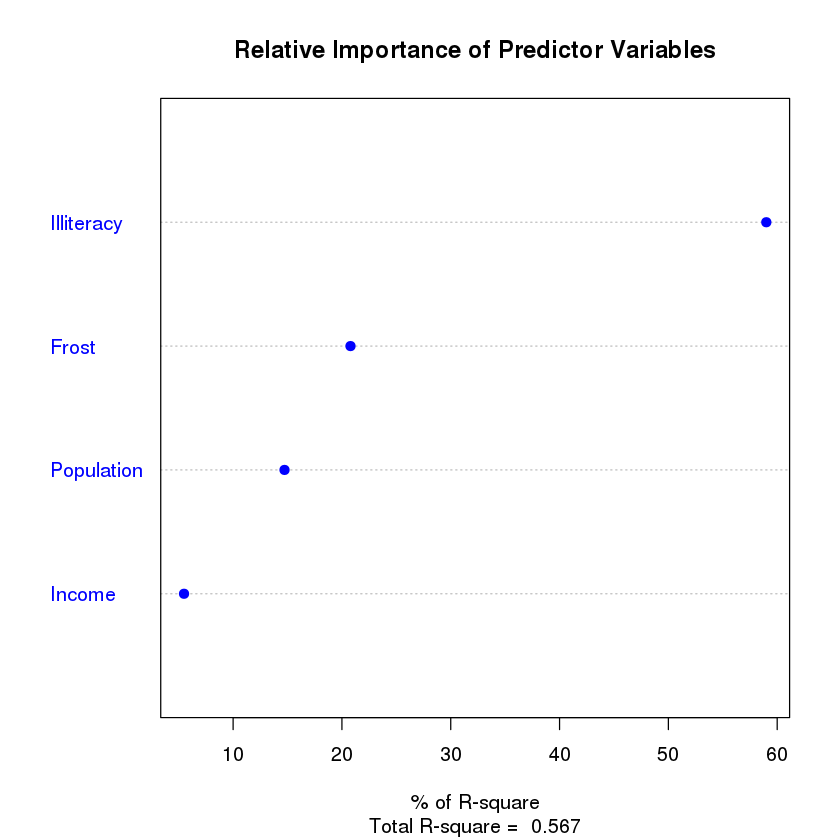

In [25]:
#applying the relweights() function:
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")]) #create dataset
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states) #create the lm() function
relweights(fit, col = "blue") #run the relweights() function

In [26]:
#you can see from the chart above that the total variance accounted for by the model
#(0.567) has been divided among the predictor variables.  Illiteracy accounts for
#59% of the R-squared, Frost 20.79% and so on.

#based on this method of relative weights, Illiteracy has the greatest relative importance
#followed by frost, population and income, in that order.